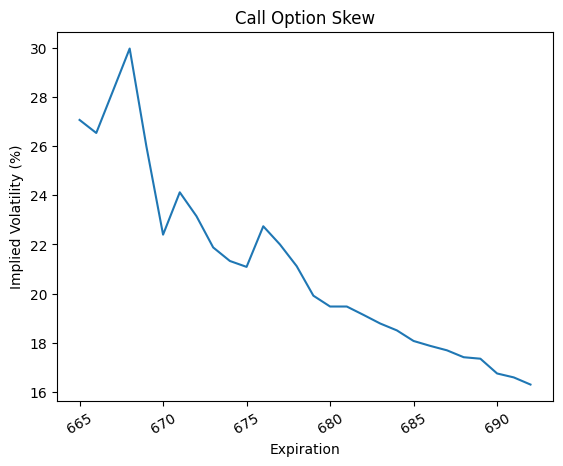

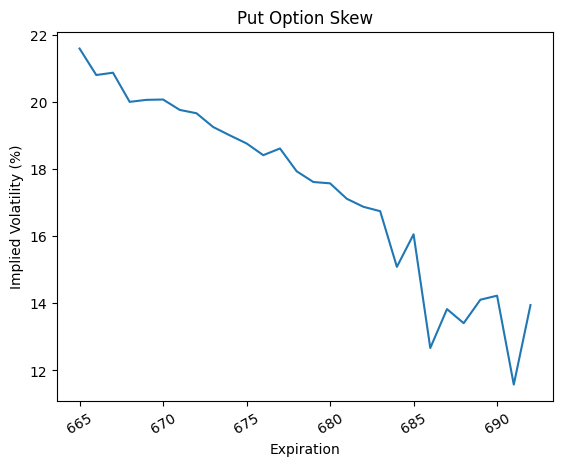

In [118]:
#IMPLIED VOLATILITY SKEW

from blackScholesChain import impliedVol
import yfinance as yf
import datetime as dt
from pandas import DataFrame, Series

#PARAMETERS
stock = yf.Ticker("SPY")
expiration = "2026-01-30" #YYYY-MM-DD

#IMPLIED VOL CALCULATIONS
c,p = DataFrame(stock.option_chain(date = expiration)[0]),DataFrame(stock.option_chain(date = expiration)[1])
c.set_index("strike", inplace = True), p.set_index("strike", inplace = True)
c.index.name = "Strike"
S = stock.info["regularMarketPrice"]
c = c.loc[int(0.98*S):int(1.02*S),:] #plots strikes ranging from 98% to 102% moneyness
p = p.loc[int(0.98*S):int(1.02*S),:]
t = (dt.datetime(int(expiration[:4]),int(expiration[5:7]),int(expiration[8:]))-dt.datetime.now()).days/365
call, put = impliedVol(S,c.index,0.04,t,c["lastPrice"],p["lastPrice"])

#PLOT
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.plot(call.index, call.str.replace("%","").astype(float)), ax2.plot(put.index, put.str.replace("%","").astype(float))
ax1.set(xlabel = "Expiration",ylabel = "Implied Volatility (%)", title = "Call Option Skew"), ax1.tick_params(axis = "x", labelrotation = 30)
ax2.set(xlabel = "Expiration",ylabel = "Implied Volatility (%)", title = "Put Option Skew"), ax2.tick_params(axis = "x", labelrotation = 30);

2026-01-21    22.42
2026-01-22    20.49
2026-01-23    20.68
2026-01-26    16.60
2026-01-27    16.83
2026-01-28    17.56
2026-01-29    18.53
2026-01-30    18.35
2026-02-06    17.76
2026-02-13    17.21
2026-02-20    16.73
2026-02-27    16.72
2026-03-20    16.44
2026-03-31    15.95
2026-04-17    15.91
2026-04-30    16.15
Name: Implied Volatility, dtype: float64


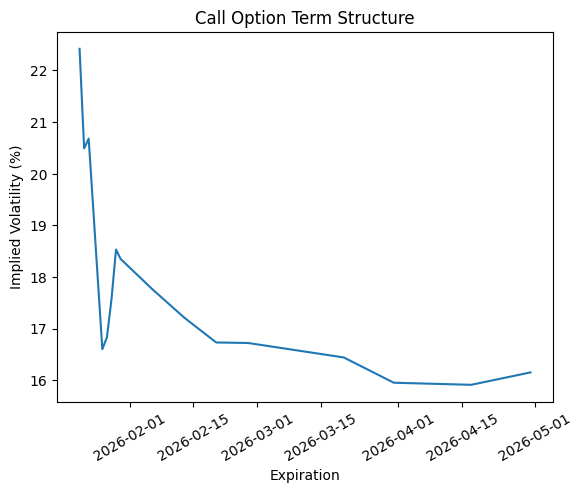

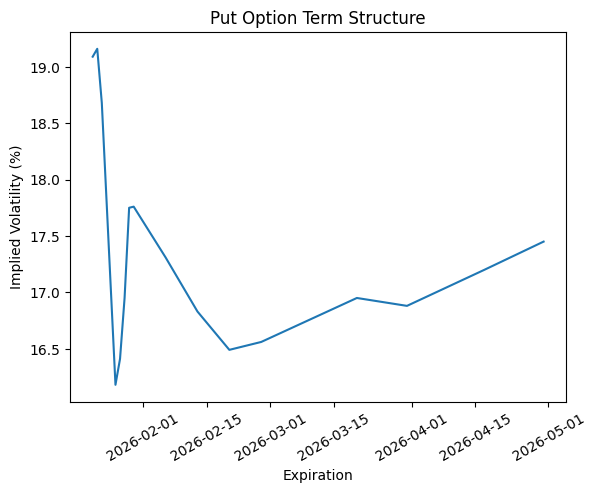

In [121]:
#IMPLIED VOLATILITY TERM STRUCTURE

from blackScholesChain import impliedVol
import yfinance as yf
import datetime as dt
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

#PARAMETERS
stock = yf.Ticker("SPY")
strike = 680
no_expirations = 16 #<= len(stock.options)

#IMPLIED VOL CALCULATIONS
dates = np.array(stock.options[1:no_expirations+1], dtype = "datetime64[D]", order = "K", subok = False, ndmin = 0)
t_till = np.array(dates-np.full(no_expirations, fill_value = dt.date.today(), dtype = "datetime64[D]"), dtype = "float64")/365 #time till expiration; in years
call = Series(index = dates, name = "Call Implied Volatilities")
put = Series(index = dates, name = "Put Implied Volatilities")
for i,t in enumerate(t_till):
    c,p = impliedVol(stock.info["regularMarketPrice"],[strike], 0.04, t,
                     stock.option_chain(date = str(dates[i]))[0].query(f"strike == {strike}")["lastPrice"], stock.option_chain(date = str(dates[i]))[1].query(f"strike == {strike}")["lastPrice"])
    call.iloc[i], put.iloc[i] = float(c.iloc[0][:-1]),float(p.iloc[0][:-1])

#PLOT
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
ax1.plot(call.index, call), ax2.plot(put.index, put)
ax1.set(xlabel = "Expiration",ylabel = "Implied Volatility (%)", title = "Call Option Term Structure"), ax1.tick_params(axis = "x", labelrotation = 30)
ax2.set(xlabel = "Expiration",ylabel = "Implied Volatility (%)", title = "Put Option Term Structure"), ax2.tick_params(axis = "x", labelrotation = 30);